In [5]:
import os
import numpy as np
import pandas as pd #for manipulating DataFrame
import matplotlib.pyplot as plt #for plotting
import seaborn as sns

In [6]:
os.chdir(os.getcwd()) #Setting the working directory

In [7]:
dataFrame = pd.read_csv('train.csv') #as both ipynb and train file are in same diectory this will work

In [8]:
dataFrame.head() #this will print the first 5 rows of the dataSet
dataFrame.tail() #this will print the last 5 rows of the dataSet

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [9]:
dataFrame.shape #shape will show the total number of columns and rows in the dataFrame.

(1460, 81)

In [10]:
dataFrame.info() # this'll show all the columns nad their respective types instead of using shape info() is good choice

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

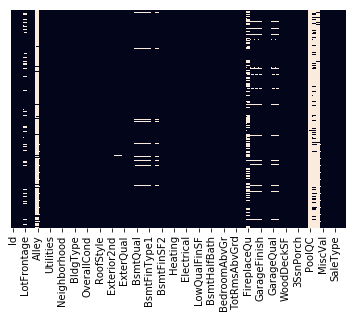

In [11]:
sns.heatmap(dataFrame.isnull(),yticklabels = False,cbar=False)

In [12]:
dataFrame.isnull().sum().sort_values(ascending = False).head()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [13]:
#dropping top 4 columns as they consists more than 80% of Null values, so no point in imputing the values
# also dropping the ID as this does not have any sugnificance and making the DaatFrame Leaner
dataFrame.drop(['Id','PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace= True)

In [14]:
dataFrame.shape #here shape is used because we are just looking at the column count

(1460, 76)

In [15]:
dataFrame.isnull().sum().sort_values(ascending = False)

FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
YearBuilt          0
Exterior2nd        0
Exterior1st        0
ExterQual          0
ExterCond          0
Foundation         0
RoofMatl           0
RoofStyle          0
YearRemodAdd       0
SalePrice          0
OverallCond        0
OverallQual        0
HouseStyle         0
BldgType           0
Condition2         0
                ... 
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
BsmtUnfSF          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr 

In [16]:
#dataFrame['FireplaceQu'].dtype.kind
#dataFrame['LotFrontage'].dtype.kind
#dataFrame['GarageCond'].dtype.kind
#dataFrame['GarageYrBlt'].dtype.kind
#dataFrame['GarageFinish'].dtype.kind
#dataFrame['GarageQual'].dtype.kind
#dataFrame['BsmtExposure'].dtype.kind
#dataFrame['BsmtFinType2'].dtype.kind
#dataFrame['BsmtFinType1'].dtype.kind
#dataFrame['BsmtCond'].dtype.kind
#dataFrame['BsmtQual'].dtype.kind
#dataFrame['MasVnrType'].dtype.kind
#dataFrame['MasVnrArea'].dtype.kind
dataFrame['Electrical'].dtype.kind

'O'

In [17]:
dataFrame.info('LotFrontage')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

In [18]:
#Imputing the Missing Values
#we will impute mean values of the columns where there is numerical value
#for categorical values we will impute with mode
dataFrame['LotFrontage']=dataFrame['LotFrontage'].fillna(dataFrame['LotFrontage'].mean())
dataFrame['BsmtCond']=dataFrame['BsmtCond'].fillna(dataFrame['BsmtCond'].mode()[0])
dataFrame['BsmtQual']=dataFrame['BsmtQual'].fillna(dataFrame['BsmtQual'].mode()[0])
dataFrame['FireplaceQu']=dataFrame['FireplaceQu'].fillna(dataFrame['FireplaceQu'].mode()[0])
dataFrame['GarageType']=dataFrame['GarageType'].fillna(dataFrame['GarageType'].mode()[0])
dataFrame['GarageFinish']=dataFrame['GarageFinish'].fillna(dataFrame['GarageFinish'].mode()[0])
dataFrame['GarageQual']=dataFrame['GarageQual'].fillna(dataFrame['GarageQual'].mode()[0])
dataFrame['GarageCond']=dataFrame['GarageCond'].fillna(dataFrame['GarageCond'].mode()[0])
dataFrame['GarageCond']=dataFrame['GarageCond'].fillna(dataFrame['GarageCond'].mode()[0])
dataFrame['BsmtFinType2']=dataFrame['BsmtFinType2'].fillna(dataFrame['BsmtFinType2'].mode()[0])
dataFrame['BsmtExposure']= dataFrame['BsmtExposure'].fillna(dataFrame['BsmtExposure'].mode()[0])
dataFrame['BsmtFinType1']= dataFrame['BsmtFinType1'].fillna(dataFrame['BsmtFinType1'].mode()[0])
dataFrame['MasVnrType']=dataFrame['MasVnrType'].fillna(dataFrame['MasVnrType'].mode()[0])
dataFrame['MasVnrArea']=dataFrame['MasVnrArea'].fillna(dataFrame['MasVnrArea'].mode()[0])

In [19]:
dataFrame.shape

(1460, 76)

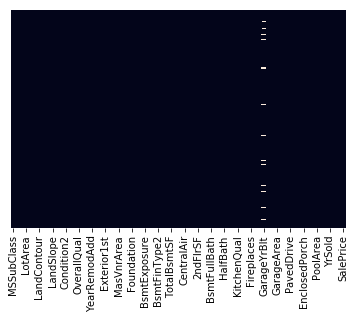

In [20]:
sns.heatmap(dataFrame.isnull(),yticklabels = False,cbar=False)
#in the below Seaborn plot no spots mean we still have some missing value

In [21]:
dataFrame.drop(['GarageYrBlt'],axis=1,inplace=True)

In [22]:
dataFrame.isnull().sum().sort_values(ascending = False)

Electrical       1
SalePrice        0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
TotalBsmtSF      0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
                ..
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
GarageFinish     0
GarageType       0
FireplaceQu      0
BsmtHalfBath     0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
FullBath    

In [23]:
#removing Only one row will not affect the dataset so I am not imputing the one missing value; I am removing the row 
dataFrame.dropna(inplace = True)

In [24]:
dataFrame.shape

(1459, 75)

In [25]:
#As we have a lot of categorocal Data in the column we need to handle them

columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [26]:
len(columns)

39

In [27]:
#function for creating dummies for 39 categoricl values
def oneHotEncodingCtegoricalColumns(multcolumns):
    dataFrame_final=final_dataFrame
    i=0
    for fields in multcolumns:
        
        print(fields)
        dataFrame1=pd.get_dummies(final_dataFrame[fields],drop_first=True)
        
        final_dataFrame.drop([fields],axis=1,inplace=True)
        if i==0:
            dataFrame_final=dataFrame1.copy()
        else:
            
            dataFrame_final=pd.concat([dataFrame_final,dataFrame1],axis=1)
        i=i+1
       
        
    dataFrame_final=pd.concat([final_dataFrame,dataFrame_final],axis=1)
        
    return dataFrame_final

In [28]:
#Saving a back up copy of the dataframe
actualDataFrame = dataFrame.copy()

In [29]:
testDataFrame = pd.read_csv('CleanedTestData.csv')

In [33]:
testDataFrame.shape


(1449, 74)

In [32]:
dataFrame.shape

(1459, 75)

In [34]:
final_dataFrame = pd.concat([dataFrame,testDataFrame],axis = 0)

C:\Users\PSK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [35]:
final_dataFrame['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1419         NaN
1420         NaN
1421         NaN
1422         NaN
1423         NaN
1424         NaN
1425         NaN
1426         NaN
1427         NaN
1428         NaN
1429         NaN
1430         NaN
1431         NaN
1432         NaN
1433         NaN
1434         NaN
1435         NaN
1436         NaN
1437         NaN
1438         NaN
1439         NaN
1440         NaN
1441         NaN
1442         NaN
1443         NaN
1444         NaN
1445         NaN
1446         N

In [36]:
final_dataFrame.shape

(2908, 75)

In [37]:
final_dataFrame = oneHotEncodingCtegoricalColumns(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [38]:
final_dataFrame.shape

(2908, 236)

In [42]:
#Deleteing the duplicate columns 
final_dataFrame =final_dataFrame.loc[:,~final_dataFrame.columns.duplicated()]

In [43]:
final_dataFrame.shape

(2908, 176)

In [49]:
#Now Spliiting the DataSet into Training and Testing
df_Train=final_dataFrame.iloc[:1422,:]
df_Test=final_dataFrame.iloc[1422:,:]


In [51]:
df_Train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,1,1,0,0,0,0,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,1,1,0,0,0,0,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,1,1,0,0,0,0,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,1,0,0,0,0,1,0,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,1,1,0,0,0,0,1,0


In [52]:
df_Test.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
1423,1575,626,0,4,0.0,0.0,0.0,0.0,697.0,0,...,0,0,1,1,0,0,0,0,0,0
1424,1344,0,0,2,457.0,374.0,1.0,0.0,193.0,0,...,1,0,0,0,0,0,0,1,0,0
1425,1252,0,0,3,0.0,0.0,0.0,0.0,1252.0,0,...,0,0,1,0,0,0,0,1,0,0
1426,1223,904,0,3,1000.0,0.0,1.0,0.0,223.0,0,...,0,0,1,1,0,0,0,0,1,0
1427,1048,510,0,3,580.0,0.0,1.0,0.0,333.0,0,...,0,0,1,1,0,0,0,0,0,0


In [60]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
          ...   
1393    163000.0
1394    246578.0
1395    281213.0
1396    160000.0
1397    137500.0
1398    138000.0
1399    137450.0
1400    120000.0
1401    193000.0
1402    193879.0
1403    282922.0
1404    105000.0
1405    275000.0
1406    133000.0
1407    112000.0
1408    125500.0
1409    215000.0
1410    230000.0
1411    140000.0
1412     90000.0
1413    257000.0
1414    207000.0
1415    175900.0
1416    122500.0
1417    340000.0
1418    124000.0
1419    223000.0
1420    179900

In [70]:
import sys
!{sys.executable} -m pip install xgboost

In [78]:
import xgboost 
classifier  = xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

C:\Users\PSK\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\PSK\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[20:46:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [79]:
import sys
!{sys.executable} -m pip install pickle

  Could not find a version that satisfies the requirement pickle (from versions: )
No matching distribution found for pickle


In [80]:
import pickle
filename = 'initialModel.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [82]:
y_pred =classifier.predict(df_Test)

In [83]:
y_pred

array([184150.8 , 131824.33, 138335.81, ..., 171636.88, 124530.75,
       242019.78], dtype=float32)

In [90]:
#Submission File
pred = pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
dataFrame.dropna(inplace = True)
datasets.to_csv('sample_submission.csv',index=False)

In [85]:
y_pred.shape

(1486,)

In [86]:
datasets.shape

(1486, 2)

In [91]:
datasets

,Id,SalePrice
0,1461.0,184150.796875
1,1462.0,131824.328125
2,1463.0,138335.812500
3,1464.0,253585.093750
4,1465.0,141268.437500
5,1466.0,114230.960938
6,1467.0,182066.828125
7,1468.0,176757.515625
8,1469.0,135638.328125
9,1470.0,104521.890625
